In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm




In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [5]:
data.shape

(158, 12)

In [6]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
#replacing the zero values with the mean of the column
data['Economy (GDP per Capita)']=data['Economy (GDP per Capita)'].replace(0,data['Economy (GDP per Capita)'].mean())
data['Family']=data['Family'].replace(0,data['Family'].mean())
data['Health (Life Expectancy)']=data['Health (Life Expectancy)'].replace(0,data['Health (Life Expectancy)'].mean())
data['Freedom']=data['Freedom'].replace(0,data['Freedom'].mean())
data['Trust (Government Corruption)']=data['Trust (Government Corruption)'].replace(0,data['Trust (Government Corruption)'].mean())
data['Generosity']=data['Generosity'].replace(0,data['Generosity'].mean())


In [8]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.851493,0.997318,0.634248,0.431328,0.144330,0.238797,2.098977
std,45.754363,1.145010,0.017146,0.397388,0.260556,0.241870,0.146734,0.119484,0.125252,0.553550
min,1.000000,2.839000,0.018480,0.015300,0.139950,0.047760,0.076990,0.002270,0.001990,0.328580
25%,40.250000,4.526000,0.037268,0.557532,0.861422,0.447215,0.329603,0.062550,0.154913,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.108770,0.217155,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [9]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [10]:
data.drop(['Country','Region'],axis=1,inplace=True)
data.head()


,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [11]:
data.columns

Index(['Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [12]:
import warnings
warnings.filterwarnings('ignore')

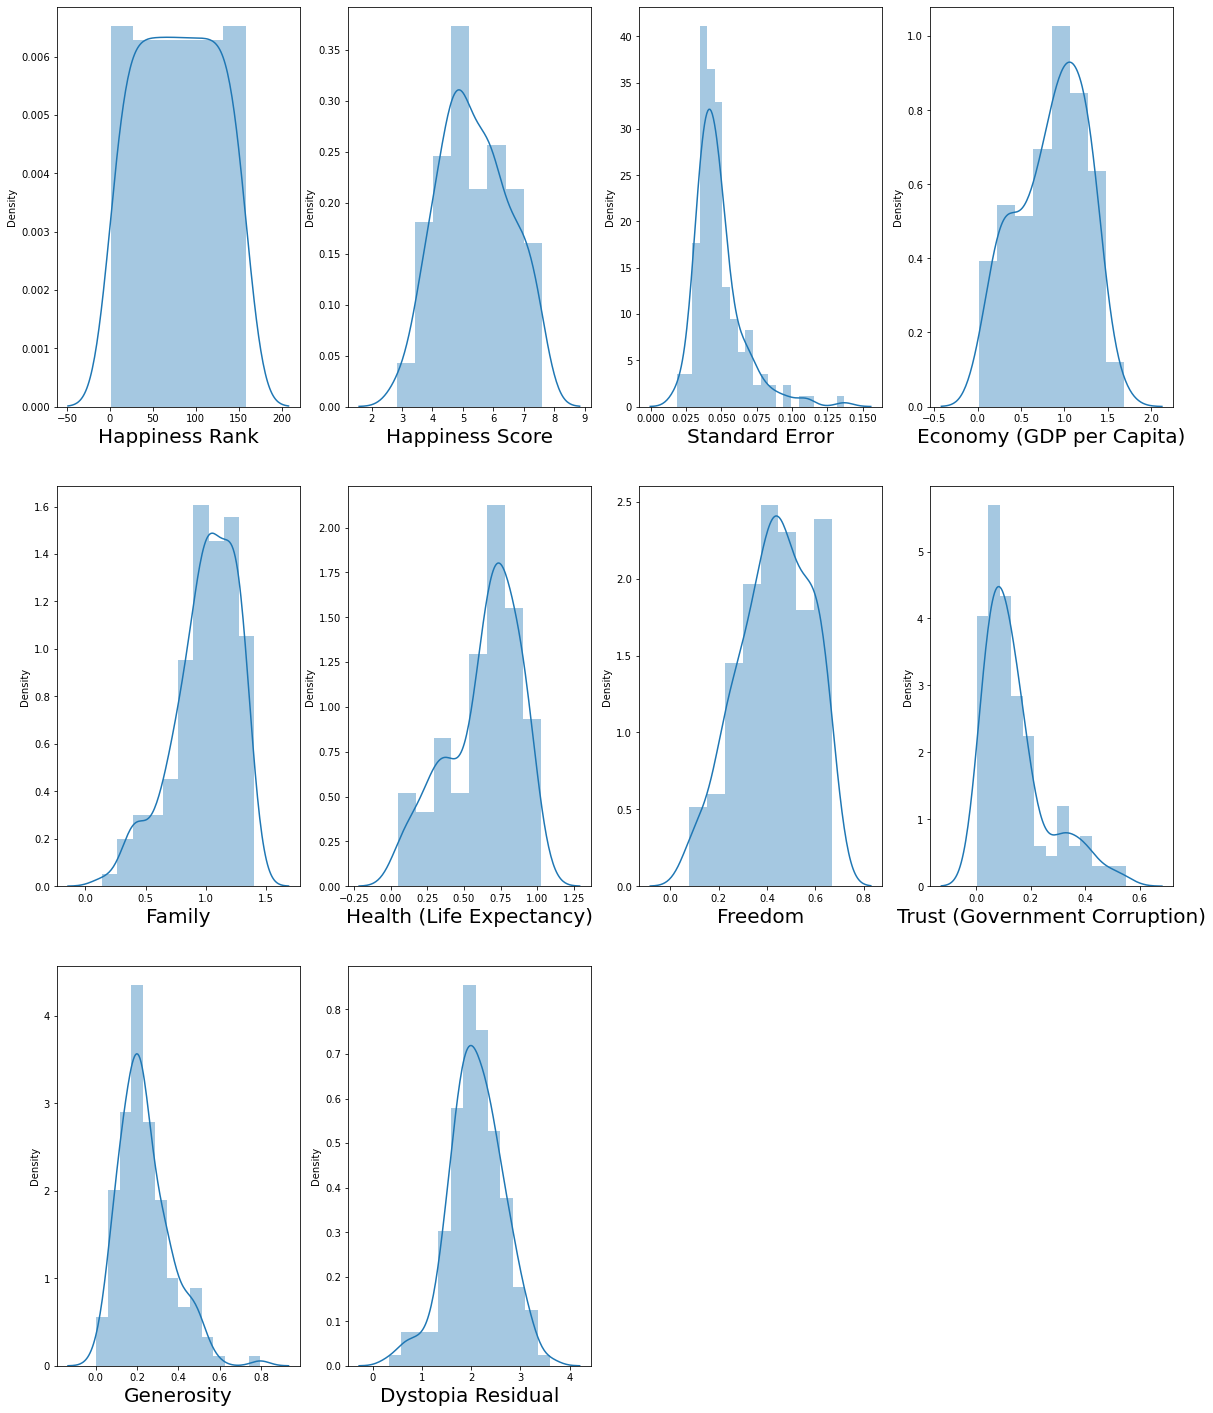

In [13]:
#now lets see how data is distributed in each column
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in data:
    if plotnumber<=11:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()    
    

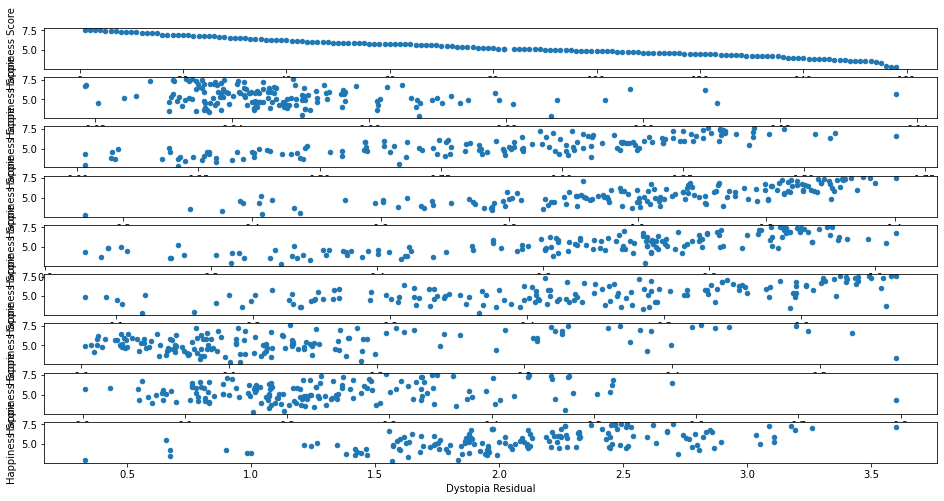

In [14]:
#now lets will check relation of each feature with target column
fig,axs=plt.subplots(9,1)
data.plot(kind='scatter',x='Happiness Rank',y='Happiness Score',ax=axs[0],figsize=(16,8))
data.plot(kind='scatter',x='Standard Error',y='Happiness Score',ax=axs[1],figsize=(16,8))
data.plot(kind='scatter',x='Economy (GDP per Capita)',y='Happiness Score',ax=axs[2],figsize=(16,8))
data.plot(kind='scatter',x='Family',y='Happiness Score',ax=axs[3],figsize=(16,8))
data.plot(kind='scatter',x='Health (Life Expectancy)',y='Happiness Score',ax=axs[4],figsize=(16,8))
data.plot(kind='scatter',x='Freedom',y='Happiness Score',ax=axs[5],figsize=(16,8))
data.plot(kind='scatter',x='Trust (Government Corruption)',y='Happiness Score',ax=axs[6],figsize=(16,8))
data.plot(kind='scatter',x='Generosity',y='Happiness Score',ax=axs[7],figsize=(16,8))
data.plot(kind='scatter',x='Dystopia Residual',y='Happiness Score',ax=axs[8],figsize=(16,8))
fig.savefig('testdata.jpg')

In [15]:
data.drop(['Happiness Rank','Standard Error','Dystopia Residual'],axis=1,inplace=True)
data.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [16]:
data.columns

Index(['Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

In [17]:
#devide data set into feature and label
y=data['Happiness Score']
x=data.drop(['Happiness Score'],axis=1)

In [18]:
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

In [19]:
print(x.head())

   Economy (GDP per Capita)   Family  Health (Life Expectancy)  Freedom  \
0                   1.39651  1.34951                   0.94143  0.66557   
1                   1.30232  1.40223                   0.94784  0.62877   
2                   1.32548  1.36058                   0.87464  0.64938   
3                   1.45900  1.33095                   0.88521  0.66973   
4                   1.32629  1.32261                   0.90563  0.63297   

   Trust (Government Corruption)  Generosity  
0                        0.41978     0.29678  
1                        0.14145     0.43630  
2                        0.48357     0.34139  
3                        0.36503     0.34699  
4                        0.32957     0.45811  


In [20]:
data.shape

(158, 7)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[ 1.37586008e+00,  1.35599026e+00,  1.27406393e+00,
         1.60145304e+00,  2.31267103e+00,  4.64398463e-01],
       [ 1.13808374e+00,  1.55897013e+00,  1.30064999e+00,
         1.34986113e+00, -2.41767450e-02,  1.58185176e+00],
       [ 1.19654961e+00,  1.39861141e+00,  9.97046308e-01,
         1.49076627e+00,  2.84824937e+00,  8.21691981e-01],
       [ 1.53361189e+00,  1.28453149e+00,  1.04088635e+00,
         1.62989387e+00,  1.85299218e+00,  8.66543891e-01],
       [ 1.19859440e+00,  1.25242124e+00,  1.12558016e+00,
         1.37857542e+00,  1.55527141e+00,  1.75653393e+00],
       [ 1.10761384e+00,  1.23567309e+00,  1.05706195e+00,
         1.43819177e+00,  2.26179151e+00, -4.23480249e-02],
       [ 1.20654636e+00,  1.08902091e+00,  1.07253247e+00,
         1.26091518e+00,  1.45930557e+00,  1.90062069e+00],
       [ 1.21227683e+00,  1.12328724e+00,  1.14731354e+00,
         1.56200507e+00,  2.46933966e+00,  9.91728775e-01],
       [ 1.00645981e+00,  1.24110180e+00,  1.136

# Model building

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=323)

In [37]:
y_train.head()

139    3.956
72     5.429
145    3.781
64     5.709
40     6.168
Name: Happiness Score, dtype: float64

In [25]:
#model instantiating and training
regression=LinearRegression()
regression.fit(x_train,y_train)


LinearRegression()

In [26]:
#predict the happiness score of given feature
data.tail(2)

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727
157,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681


In [27]:
print('happiness score is:',regression.predict(scalar.transform([[0.20868,0.13995,0.28443,0.36453,0.10731,0.16681]])))

happiness score is: [3.1604782]


# saving model for further prediction


In [29]:
#saving model to the local file system
filename='finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))
#prediction using the saved model
Loaded_model=pickle.load(open(filename,'rb'))
a=Loaded_model.predict(scalar.transform([[0.01530,0.41587,0.22396,0.11850,0.10062,0.19727]]))
a

array([3.02033217])

In [30]:
#Adjusted R2 score
regression.score(x_train,y_train)

0.7671823670972298

In [31]:
#check how well model fits the test data
regression.score(x_test,y_test)

0.8002395894286259

In [33]:
#lets plot and visualize
y_pred=regression.predict(x_test)
y_pred

array([5.01719289, 6.9873739 , 5.03636923, 4.70552308, 5.61470249,
       7.0592137 , 4.64732303, 5.34996131, 4.10559376, 4.40065737,
       5.40262148, 6.91379701, 3.83527607, 4.34474295, 4.10262335,
       3.1604782 , 4.65189571, 5.33790196, 6.7681709 , 6.95604704,
       6.34782294, 5.54248894, 6.9414171 , 5.31547584, 5.57994759,
       6.1449828 , 4.36136965, 5.25612143, 3.9191007 , 4.26840161,
       5.94973027, 4.89549845, 6.29349209, 4.35781388, 6.10747641,
       6.98280757, 4.7259056 , 6.04894525, 4.83622917, 5.80959588])

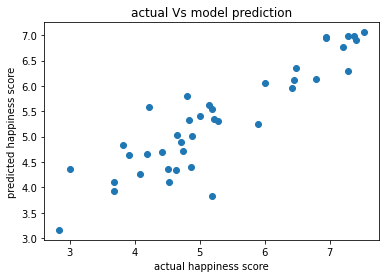

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual happiness score')
plt.ylabel('predicted happiness score')
plt.title('actual Vs model prediction')
plt.show()
           